## In Milestone 3, you will begin the process of selecting, building, and evaluating a model. 
### You are required to train and evaluate at least one model in this milestone. 
### Write step-by-step for performing each of these steps. 
### You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. 
### It is important to think about what type of model and metric makes sense for your problem. 
### Again, do what makes the most sense for your project. 

In [338]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix
import yellowbrick
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [339]:
#load the Congressional data into a dataframe
df = pd.read_csv('congressional_resignations.csv') 
df.head(5)

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A


In [340]:
df.shape

(615, 8)

In [341]:
#look at the column data types
df.dtypes

Member              object
Party               object
District            object
Congress            object
Resignation Date    object
Reason              object
Source              object
Category            object
dtype: object

In [342]:
df[['Category', 'Secondary Category']] = df['Category'].str.split(' &', 1, expand=True)
df.head(5)

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D,None
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X,None
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X,None
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X,None
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A,None


In [343]:
df.shape

(615, 9)

In [344]:
# 'X': 'Unwanted sexual contact', 'A': 'Consensual sex scandals', 'B': 'Other scandals', 'C': 'Other Office', 
# 'D': 'Private Sector', 'E': 'Health or Family', 'F': 'Other', 'G': 'Left Early''H': 'Military Service', 'I': 'Election Overturned'

In [345]:
# Add State column based on District column
df[['State', 'District']] = df['District'].str.split('-', 1, expand=True)
# Shift State column to 3rd position
third_column = df.pop('State')
# insert column using insert(position,column_name,third_column) function
df.insert(2, 'State', third_column)
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category
0,Pat Tiberi,R,OH,12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D,None
1,Al Franken,D,MN,SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X,None
2,Trent Franks,R,AZ,08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X,None
3,John Conyers,D,MI,13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X,None
4,Tim Murphy,R,PA,18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A,None


In [346]:
# Change Resigation Date from an object feature to date/time feature
df['Resignation Date'] = pd.to_datetime(df['Resignation Date'], infer_datetime_format=True)

In [347]:
#look at the column data types
df.dtypes

Member                        object
Party                         object
State                         object
District                      object
Congress                      object
Resignation Date      datetime64[ns]
Reason                        object
Source                        object
Category                      object
Secondary Category            object
dtype: object

In [348]:
# Convert all / forward slashes to a space
df['Reason'] = df['Reason'].str.replace('/', ' ')
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category
0,Pat Tiberi,R,OH,12,115th,2018-01-15,Took a job with the Ohio Business Roundtable,New York Times,D,None
1,Al Franken,D,MN,SEN,115th,2018-01-02,Sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None
2,Trent Franks,R,AZ,08,115th,2017-12-08,Sexual harassment surrogacy pressure,CNN,X,None
3,John Conyers,D,MI,13,115th,2017-12-05,Sexual harassment inappropriate touching,Washington Post,X,None
4,Tim Murphy,R,PA,18,115th,2017-10-21,Extramarital affair abortion hypocrisy,POLITICO,A,None


In [349]:
# Convert all text to lowercase
df['Reason'] = df['Reason'].str.lower() # use str.lower to convert all text to lowercase letters
# df['Party'] = df['Party'].str.lower()
# Remove punctuation and special characters
df['Reason'] = df['Reason'].str.replace(r'[^\w\s]+', '') # use str.replace to remove all the special characters
# df['Party'] = df['Party'].str.replace(r'[^\w\s]+', '')
df.head(5)

## ASK: Should I also tokenize the Party column? Or, should I change the letters into numbers another way so I can plug them into the Logistic Regression Model?

<ipython-input-349-31d20a85cb61>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reason'] = df['Reason'].str.replace(r'[^\w\s]+', '') # use str.replace to remove all the special characters


,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category
0,Pat Tiberi,R,OH,12,115th,2018-01-15,took a job with the ohio business roundtable,New York Times,D,None
1,Al Franken,D,MN,SEN,115th,2018-01-02,sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None
2,Trent Franks,R,AZ,08,115th,2017-12-08,sexual harassment surrogacy pressure,CNN,X,None
3,John Conyers,D,MI,13,115th,2017-12-05,sexual harassment inappropriate touching,Washington Post,X,None
4,Tim Murphy,R,PA,18,115th,2017-10-21,extramarital affair abortion hypocrisy,POLITICO,A,None


In [350]:
porter_stemmer = PorterStemmer() #create porter_stemmer variable

In [351]:
# Tokenize the sentences
df['Reason_tokenized']=df['Reason'].apply(lambda x : filter(None,x.split(" ")))

In [352]:
# Apply stemmer to the above tokenized column as follows
df['Reason_stemmed']=df['Reason_tokenized'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [353]:
# Go back to review in sentence format
df['Reason_stemmed_sentence']=df['Reason_stemmed'].apply(lambda x : " ".join(x))
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence
0,Pat Tiberi,R,OH,12,115th,2018-01-15,took a job with the ohio business roundtable,New York Times,D,None,<filter object at 0x000001CB12C7B100>,"[took, a, job, with, the, ohio, busi, roundtabl]",took a job with the ohio busi roundtabl
1,Al Franken,D,MN,SEN,115th,2018-01-02,sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None,<filter object at 0x000001CB12C7B550>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss
2,Trent Franks,R,AZ,08,115th,2017-12-08,sexual harassment surrogacy pressure,CNN,X,None,<filter object at 0x000001CB12C7B9A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur
3,John Conyers,D,MI,13,115th,2017-12-05,sexual harassment inappropriate touching,Washington Post,X,None,<filter object at 0x000001CB12C7BB80>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch
4,Tim Murphy,R,PA,18,115th,2017-10-21,extramarital affair abortion hypocrisy,POLITICO,A,None,<filter object at 0x000001CB12C71490>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi


In [354]:
# add a Reason Sentiment column (0 is a positive or neutral registation reason/successful candidate, and 1 is  negative registation reason/unsuccessful candidate)
# import TextBlob
from textblob import TextBlob
# Classify each reason as positive or negative
df[['polarity', 'subjectivity']] = df['Reason'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity
0,Pat Tiberi,R,OH,12,115th,2018-01-15,took a job with the ohio business roundtable,New York Times,D,None,<filter object at 0x000001CB12C7B100>,"[took, a, job, with, the, ohio, busi, roundtabl]",took a job with the ohio busi roundtabl,0.0,0.000000
1,Al Franken,D,MN,SEN,115th,2018-01-02,sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None,<filter object at 0x000001CB12C7B550>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333
2,Trent Franks,R,AZ,08,115th,2017-12-08,sexual harassment surrogacy pressure,CNN,X,None,<filter object at 0x000001CB12C7B9A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333
3,John Conyers,D,MI,13,115th,2017-12-05,sexual harassment inappropriate touching,Washington Post,X,None,<filter object at 0x000001CB12C7BB80>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667
4,Tim Murphy,R,PA,18,115th,2017-10-21,extramarital affair abortion hypocrisy,POLITICO,A,None,<filter object at 0x000001CB12C71490>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000


In [355]:
# Create Reason_score column based on the polarity column
df['Reason_score'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0) # 0 is a neutral/positive sentiment, and 1 is a negative sentiment of the Reason column
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity,Reason_score
0,Pat Tiberi,R,OH,12,115th,2018-01-15,took a job with the ohio business roundtable,New York Times,D,None,<filter object at 0x000001CB12C7B100>,"[took, a, job, with, the, ohio, busi, roundtabl]",took a job with the ohio busi roundtabl,0.0,0.000000,0
1,Al Franken,D,MN,SEN,115th,2018-01-02,sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None,<filter object at 0x000001CB12C7B550>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333,1
2,Trent Franks,R,AZ,08,115th,2017-12-08,sexual harassment surrogacy pressure,CNN,X,None,<filter object at 0x000001CB12C7B9A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333,1
3,John Conyers,D,MI,13,115th,2017-12-05,sexual harassment inappropriate touching,Washington Post,X,None,<filter object at 0x000001CB12C7BB80>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667,1
4,Tim Murphy,R,PA,18,115th,2017-10-21,extramarital affair abortion hypocrisy,POLITICO,A,None,<filter object at 0x000001CB12C71490>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000,0


In [363]:
# Create additional column for numerical values of Party column (1 is Republican, 0 is Democrat)
df['Party_Coded'] = df['Party'].replace(to_replace=["R","D"], value=[1,0])
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity,Reason_score,Party Coded,Party_Coded
0,Pat Tiberi,R,OH,12,115th,2018-01-15,took a job with the ohio business roundtable,New York Times,D,None,<filter object at 0x000001CB12C7B100>,"[took, a, job, with, the, ohio, busi, roundtabl]",took a job with the ohio busi roundtabl,0.0,0.000000,0,1,1
1,Al Franken,D,MN,SEN,115th,2018-01-02,sexual harassment groping unwanted kissing,Minneapolis Star Tribune,X,None,<filter object at 0x000001CB12C7B550>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333,1,0,0
2,Trent Franks,R,AZ,08,115th,2017-12-08,sexual harassment surrogacy pressure,CNN,X,None,<filter object at 0x000001CB12C7B9A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333,1,1,1
3,John Conyers,D,MI,13,115th,2017-12-05,sexual harassment inappropriate touching,Washington Post,X,None,<filter object at 0x000001CB12C7BB80>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667,1,0,0
4,Tim Murphy,R,PA,18,115th,2017-10-21,extramarital affair abortion hypocrisy,POLITICO,A,None,<filter object at 0x000001CB12C71490>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000,0,1,1


In [257]:
# look at shpae of dataframe with new columns
df.shape

(615, 13)

In [258]:
# look at column type of each column
df.dtypes

Member                             object
Party                              object
State                              object
District                           object
Congress                           object
Resignation Date           datetime64[ns]
Reason                             object
Source                             object
Category                           object
Secondary Category                 object
Reason_tokenized                   object
Reason_stemmed                     object
Reason_stemmed_sentence            object
dtype: object

## Train and Evaluate Model

In [373]:
# Split the data into a training and test set
X = df['Party_Coded'] 
# Get the target (Party) Party is either Democrat (D) or Republican (R)
y = df['Reason_score'] 
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [374]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [375]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many survived and deaths are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(492,)
(123,)
0    354
1    138
Name: Reason_score, dtype: int64
0    98
1    25
Name: Reason_score, dtype: int64


In [366]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

0
0


### Fit and apply the tf-idf vectorization to the training set and just apply to the test set

In [369]:
# Import library
#from sklearn.feature_extraction.text import TfidfVectorizer
# Create the tf-idf feature matrix
#tfidfs = TfidfVectorizer()
#x_train_vector = tfidfs.fit_transform(X_train)

In [370]:
# look at the shape of the transformed X_train_vector
#x_train_vector.shape

In [371]:
#x_test_vector = tfidfs.transform(X_test)

In [372]:
#x_test_vector.shape

### Train a logistic regression using the training data.

In [367]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [368]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(X_train, y_train) # Use x_train_vector in model as this is the vectorized version of the training set of Reason column

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Model accuracy on test set and create a confusion matrix for the test set predictions.

In [325]:
#create class labels for confusion matrix

# Create label encoder
label_encoder = {'0': 'Positive or Neutral Resignation Reason', '1': 'Negative Resignation Reason'}

#label endcoder for the Category column 
#label_encoder = {'X': 'Unwanted sexual contact', 'A': 'Consensual sex scandals', 'B': 'Other scandals', 'C': 'Other Office', 'D': 'Private Sector', 'E': 'Health or Family', 'F': 'Other', 'G': 'Left Early''H': 'Military Service', 'I': 'Election Overturned'}
#initialize the confusion matrix

cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(x_test_vector, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

# ASK: Does this confusion matrix make sense? The label encoder is D and R for Republican/Democrat and x_test_vector is the stemmed sentences of the Reason column

ModelError: cannot decode class 0 to label, key not specified by encoder

### Precision, recall, and F1-score for the test set predictions.

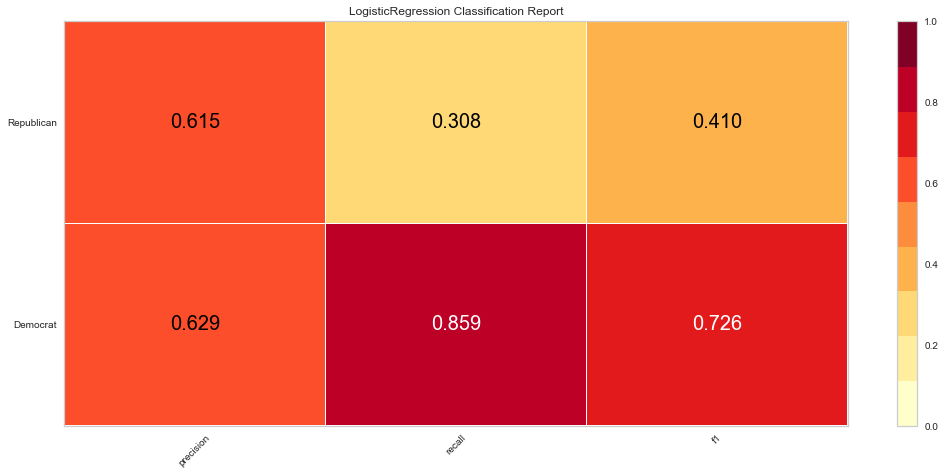

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [296]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(x_train_vector, y_test)  
#evaluate the model on the test data
class_report.score(x_test_vector, y_test)  
class_report.show()

### Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [ ]:
## ASK: How to interpret the above model findings to gain insights?
## ASK: With this low accuracy, should the target of the model be the Category column (matches the Resignation column)?